ФИО Сигутин Михаил Андреевич

Город Обнинск

Школа 17

Класс 9 "А"

Задача регрессии на наборе данных abalone заключается в предсказании возраста морских ушек (абалонов) на основе их физических характеристик. Признаки представляют собой данные, содержащие информацию о длине, диаметре, высоте, массе и других характеристиках моллюсков; целевым признаком является возраст. Задача заключается в том, чтобы на основе этих характеристик предсказать возраст морских ушек, выраженный в годах. Данные представлены в файле abalone_reduced.csv.

1. Загрузите данные из файла abalone_reduced.csv. Проверьте сколько образцов и сколько признаков в таблице.
3. Преобразуйте данные в массивы NumPy, отделяя целевой признак Rings от остальных.
2. Произведите разбиение данных на тренировочную и тестовую выборки.
4. Создайте две модели класса `DecisionTreeRegressor`.
5. Обучите модели на тренировочных данных (для первой модели задайте глубину равную 3, а для второй - 6).
6. Визуализируйте визуализируйте два дерева при помощи функции `plot_tree()`.
7. Оцените модели при помощи функции `mean_squared_error()` как на тренировочных, так и на тестовых данных. Произведите сравнение.
8. Спрогнозируйте время поездки для тренировочных и тестовых данных.
9. Снова создайте две модели класса `DecisionTreeRegressor`, и обучите их на тренировочных данных (для первой модели задайте глубину 12, для второй не указывайте глубину).
10. Выведите на печать значение глубины последней модели.
11. Оцените эти две модели при помощи функции `mean_squared_error()` как на тренировочных, так и на тестовых данных. Произведите сравнение. Убедитесь в том, что имеет место явное переобучение.
12. Вернитесь к ячейке, в которой создаются две последние модели и попробуйте задавать последней модели различные значения для параметра регуляризации `min_samples_split` (10, 50, 100, 200, 1000), и при этих значениях сравнивать оценку модели на тренировочных и тестовых данных.
12. Выясните, при каком значении параметра `min_samples_split` достигается минимальное значение ошибки модели на тестовых дынных.
14. Экспортировать код в формате html.

Прислать два файла:
- Файл с кодом в формате *.ipynb
- html формат кода

Имя каждого файла должно начинаться с фамилии и инициалов. Запакуйте файлы в архив zip, для того, чтобы прикрепить на сайте.

In [2]:
import pandas as pd

data = pd.read_csv('abalone_reduced.csv')
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
import numpy as np

X = data.drop(columns=['Rings']).to_numpy()
y = data['Rings'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_test.shape, y_test.shape

((836, 7), (836,))

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(max_depth=3)
tree_1.fit(X_train, y_train)

tree_2 = DecisionTreeClassifier(max_depth=3)
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

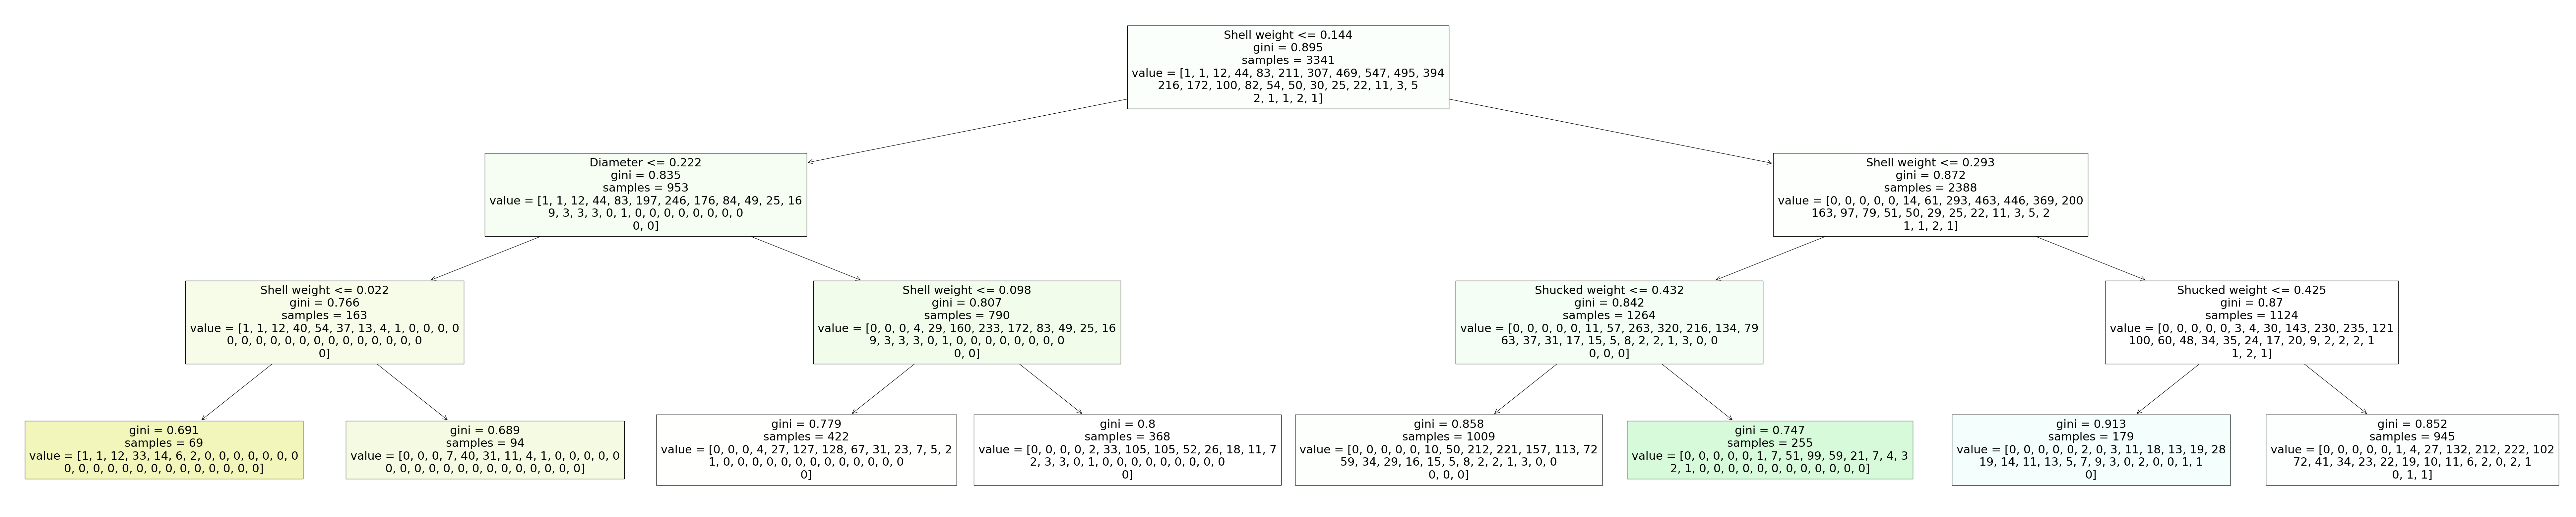

In [6]:
from sklearn.tree import plot_tree
from matplotlib.colors import to_rgb
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(100, 20)) # настройка прямоугольника

grafic1 = plot_tree(tree_1, filled=True,
          feature_names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])


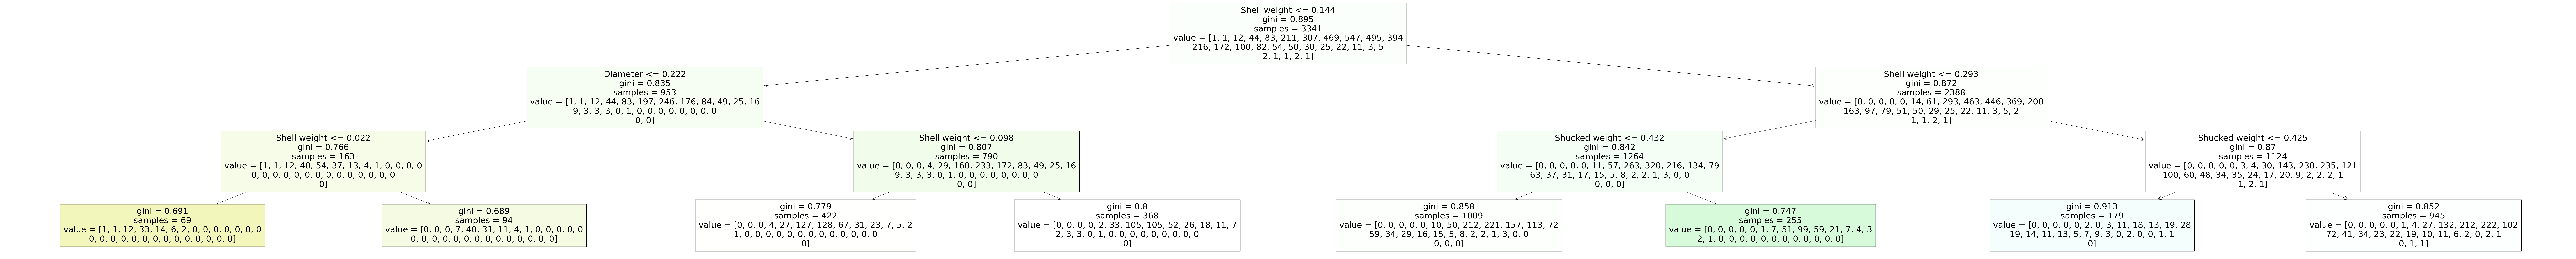

In [7]:
plt.figure(figsize=(200, 20)) # настройка прямоугольника

grafic2 = plot_tree(tree_2, filled=True,
          feature_names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])


In [8]:
y_train_predicted1 = tree_1.predict(X_train)
y_test_predicted1 = tree_1.predict(X_test)

y_train_predicted2 = tree_2.predict(X_train)
y_test_predicted2 = tree_2.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error as mse

# нахожу среднеквадратическое отклонение для tree_1
train_rmse_1 = mse(y_train, y_train_predicted1, squared=False)
test_rmse_1 = mse(y_test, y_test_predicted1, squared=False)
print(f'--среднеквадратическое отклонение tree_1--\n\n{train_rmse_1 = }\n{test_rmse_1 = }')

--среднеквадратическое отклонение tree_1--

train_rmse_1 = 2.6456381795009847
test_rmse_1 = 2.70410816295092


In [10]:
from sklearn.metrics import mean_squared_error as mse

# нахожу среднеквадратическое отклонение для tree_2
train_rmse_2 = mse(y_train, y_train_predicted2, squared=False)
test_rmse_2 = mse(y_test, y_test_predicted2, squared=False)
print(f'--среднеквадратическое отклонение tree_2--\n\n{train_rmse_2 = }\n{test_rmse_2 = }')

--среднеквадратическое отклонение tree_2--

train_rmse_2 = 2.6456381795009847
test_rmse_2 = 2.70410816295092


rmse tree_2 > rmse tree_1 => Чем выше глубина погружения, тем точнее прогноз на выходе

In [13]:
print('Real data | Predicted data -- tree_1')
for i in range(len(X_train)):
  print(f'{y_train[i]} - {y_train_predicted1[i]}')

Real data | Predicted data -- tree_1
11 - 9
8 - 7
7 - 7
7 - 5
12 - 9
7 - 9
18 - 11
9 - 7
9 - 9
7 - 7
9 - 9
8 - 9
11 - 9
6 - 7
7 - 7
13 - 13
11 - 11
14 - 11
9 - 13
8 - 9
7 - 7
9 - 11
13 - 13
17 - 11
11 - 9
8 - 9
9 - 11
11 - 7
7 - 7
10 - 9
12 - 11
10 - 11
15 - 9
9 - 13
11 - 9
9 - 9
13 - 13
5 - 5
5 - 5
10 - 11
6 - 4
13 - 11
12 - 7
13 - 11
9 - 9
9 - 7
8 - 9
4 - 7
11 - 11
11 - 9
9 - 9
12 - 11
10 - 9
10 - 11
8 - 9
10 - 11
7 - 7
9 - 11
4 - 4
13 - 13
9 - 9
12 - 9
8 - 11
6 - 7
9 - 9
11 - 11
7 - 5
12 - 9
5 - 5
11 - 13
11 - 9
7 - 7
13 - 11
9 - 9
8 - 9
10 - 9
6 - 7
8 - 7
10 - 11
18 - 13
10 - 9
5 - 5
9 - 9
8 - 9
16 - 11
12 - 9
9 - 13
11 - 9
14 - 13
11 - 9
10 - 11
11 - 9
10 - 11
11 - 11
16 - 9
8 - 9
10 - 9
7 - 7
6 - 7
6 - 7
17 - 11
13 - 9
6 - 5
8 - 9
11 - 11
13 - 11
9 - 9
10 - 7
9 - 11
13 - 11
9 - 9
6 - 7
7 - 7
17 - 13
15 - 11
4 - 7
11 - 11
11 - 9
8 - 9
10 - 9
11 - 11
7 - 7
8 - 9
7 - 7
13 - 13
7 - 7
7 - 7
11 - 9
8 - 13
13 - 9
10 - 9
9 - 9
12 - 11
6 - 7
9 - 9
9 - 9
8 - 9
7 - 7
8 - 7
14 - 9
8 - 7
10 -

In [14]:
print('Real data | Predicted data -- tree_2')
for i in range(len(X_train)):
  print(f'{y_train[i]} - {y_train_predicted2[i]}')

Real data | Predicted data -- tree_2
11 - 9
8 - 7
7 - 7
7 - 5
12 - 9
7 - 9
18 - 11
9 - 7
9 - 9
7 - 7
9 - 9
8 - 9
11 - 9
6 - 7
7 - 7
13 - 13
11 - 11
14 - 11
9 - 13
8 - 9
7 - 7
9 - 11
13 - 13
17 - 11
11 - 9
8 - 9
9 - 11
11 - 7
7 - 7
10 - 9
12 - 11
10 - 11
15 - 9
9 - 13
11 - 9
9 - 9
13 - 13
5 - 5
5 - 5
10 - 11
6 - 4
13 - 11
12 - 7
13 - 11
9 - 9
9 - 7
8 - 9
4 - 7
11 - 11
11 - 9
9 - 9
12 - 11
10 - 9
10 - 11
8 - 9
10 - 11
7 - 7
9 - 11
4 - 4
13 - 13
9 - 9
12 - 9
8 - 11
6 - 7
9 - 9
11 - 11
7 - 5
12 - 9
5 - 5
11 - 13
11 - 9
7 - 7
13 - 11
9 - 9
8 - 9
10 - 9
6 - 7
8 - 7
10 - 11
18 - 13
10 - 9
5 - 5
9 - 9
8 - 9
16 - 11
12 - 9
9 - 13
11 - 9
14 - 13
11 - 9
10 - 11
11 - 9
10 - 11
11 - 11
16 - 9
8 - 9
10 - 9
7 - 7
6 - 7
6 - 7
17 - 11
13 - 9
6 - 5
8 - 9
11 - 11
13 - 11
9 - 9
10 - 7
9 - 11
13 - 11
9 - 9
6 - 7
7 - 7
17 - 13
15 - 11
4 - 7
11 - 11
11 - 9
8 - 9
10 - 9
11 - 11
7 - 7
8 - 9
7 - 7
13 - 13
7 - 7
7 - 7
11 - 9
8 - 13
13 - 9
10 - 9
9 - 9
12 - 11
6 - 7
9 - 9
9 - 9
8 - 9
7 - 7
8 - 7
14 - 9
8 - 7
10 -

In [15]:
print('Real data | Predicted data -- tree_1')
for i in range(len(X_test)):
  print(f'{y_test[i]} - {y_test_predicted1[i]}')

Real data | Predicted data -- tree_1
9 - 13
8 - 9
16 - 13
9 - 11
14 - 9
11 - 9
7 - 9
6 - 9
7 - 7
10 - 9
22 - 9
7 - 7
15 - 9
9 - 7
8 - 9
18 - 13
11 - 13
14 - 9
13 - 11
9 - 9
20 - 11
12 - 11
12 - 11
11 - 11
10 - 9
7 - 7
11 - 9
8 - 7
9 - 9
10 - 9
9 - 11
10 - 11
6 - 7
10 - 9
8 - 9
9 - 9
5 - 7
3 - 4
6 - 7
6 - 7
12 - 11
12 - 11
18 - 11
8 - 9
12 - 9
13 - 11
10 - 9
10 - 9
18 - 9
4 - 4
6 - 7
22 - 11
8 - 9
5 - 4
7 - 7
10 - 9
15 - 11
21 - 11
10 - 9
9 - 7
10 - 11
13 - 11
11 - 9
7 - 7
9 - 7
11 - 11
4 - 4
5 - 7
7 - 9
9 - 9
10 - 11
11 - 9
10 - 7
7 - 7
9 - 7
12 - 11
23 - 11
14 - 11
15 - 11
9 - 9
15 - 9
13 - 13
10 - 11
6 - 7
7 - 7
13 - 9
9 - 9
10 - 9
19 - 11
10 - 13
10 - 9
9 - 9
11 - 11
11 - 11
10 - 11
10 - 9
6 - 7
15 - 9
7 - 9
7 - 7
15 - 13
11 - 9
11 - 11
13 - 11
7 - 9
9 - 7
10 - 11
8 - 9
9 - 11
14 - 11
18 - 11
8 - 9
13 - 13
9 - 9
12 - 7
5 - 5
9 - 9
12 - 9
11 - 11
13 - 11
11 - 11
10 - 11
8 - 9
14 - 9
9 - 9
20 - 9
9 - 11
9 - 9
9 - 9
10 - 11
9 - 9
9 - 9
10 - 11
5 - 4
8 - 5
8 - 9
10 - 11
10 - 11
5 - 5
12

In [16]:
print('Real data | Predicted data -- tree_2')
for i in range(len(X_test)):
  print(f'{y_test[i]} - {y_test_predicted2[i]}')

Real data | Predicted data -- tree_2
9 - 13
8 - 9
16 - 13
9 - 11
14 - 9
11 - 9
7 - 9
6 - 9
7 - 7
10 - 9
22 - 9
7 - 7
15 - 9
9 - 7
8 - 9
18 - 13
11 - 13
14 - 9
13 - 11
9 - 9
20 - 11
12 - 11
12 - 11
11 - 11
10 - 9
7 - 7
11 - 9
8 - 7
9 - 9
10 - 9
9 - 11
10 - 11
6 - 7
10 - 9
8 - 9
9 - 9
5 - 7
3 - 4
6 - 7
6 - 7
12 - 11
12 - 11
18 - 11
8 - 9
12 - 9
13 - 11
10 - 9
10 - 9
18 - 9
4 - 4
6 - 7
22 - 11
8 - 9
5 - 4
7 - 7
10 - 9
15 - 11
21 - 11
10 - 9
9 - 7
10 - 11
13 - 11
11 - 9
7 - 7
9 - 7
11 - 11
4 - 4
5 - 7
7 - 9
9 - 9
10 - 11
11 - 9
10 - 7
7 - 7
9 - 7
12 - 11
23 - 11
14 - 11
15 - 11
9 - 9
15 - 9
13 - 13
10 - 11
6 - 7
7 - 7
13 - 9
9 - 9
10 - 9
19 - 11
10 - 13
10 - 9
9 - 9
11 - 11
11 - 11
10 - 11
10 - 9
6 - 7
15 - 9
7 - 9
7 - 7
15 - 13
11 - 9
11 - 11
13 - 11
7 - 9
9 - 7
10 - 11
8 - 9
9 - 11
14 - 11
18 - 11
8 - 9
13 - 13
9 - 9
12 - 7
5 - 5
9 - 9
12 - 9
11 - 11
13 - 11
11 - 11
10 - 11
8 - 9
14 - 9
9 - 9
20 - 9
9 - 11
9 - 9
9 - 9
10 - 11
9 - 9
9 - 9
10 - 11
5 - 4
8 - 5
8 - 9
10 - 11
10 - 11
5 - 5
12

In [46]:
tree_3 = DecisionTreeClassifier(max_depth=12, min_samples_split=1000)
tree_3.fit(X_train, y_train)

tree_4 = DecisionTreeClassifier(min_samples_split=1000)
tree_4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=1000)

In [19]:
tree_4.get_depth()

25

In [47]:
y_train_predicted3 = tree_3.predict(X_train)
y_test_predicted3 = tree_3.predict(X_test)

y_train_predicted4 = tree_4.predict(X_train)
y_test_predicted4 = tree_4.predict(X_test)

In [27]:
# нахожу среднеквадратическое отклонение для tree_3
train_rmse_3 = mse(y_train, y_train_predicted3, squared=False)
test_rmse_3 = mse(y_test, y_test_predicted3, squared=False)
print(f'--среднеквадратическое отклонение tree_3-- min_samples_split=0\n\n{train_rmse_3 = }\n{test_rmse_3 = }')

--среднеквадратическое отклонение tree_3-- min_samples_split=0

train_rmse_3 = 1.7403258062795008
test_rmse_3 = 2.769234603113528


In [28]:
# нахожу среднеквадратическое отклонение для tree_4
train_rmse_4 = mse(y_train, y_train_predicted4, squared=False)
test_rmse_4 = mse(y_test, y_test_predicted4, squared=False)
print(f'--среднеквадратическое отклонение tree_4-- min_samples_split=0\n\n{train_rmse_4 = }\n{test_rmse_4 = }')

--среднеквадратическое отклонение tree_4-- min_samples_split=0

train_rmse_4 = 0.0
test_rmse_4 = 2.896954348554298


In [31]:
# нахожу среднеквадратическое отклонение для tree_3
train_rmse_3 = mse(y_train, y_train_predicted3, squared=False)
test_rmse_3 = mse(y_test, y_test_predicted3, squared=False)
print(f'--среднеквадратическое отклонение tree_3-- min_samples_split=10\n\n{train_rmse_3 = }\n{test_rmse_3 = }')

--среднеквадратическое отклонение tree_3-- min_samples_split=10

train_rmse_3 = 2.214277093543606
test_rmse_3 = 2.718226624264659


In [32]:
# нахожу среднеквадратическое отклонение для tree_4
train_rmse_4 = mse(y_train, y_train_predicted4, squared=False)
test_rmse_4 = mse(y_test, y_test_predicted4, squared=False)
print(f'--среднеквадратическое отклонение tree_4-- min_samples_split=10\n\n{train_rmse_4 = }\n{test_rmse_4 = }')

--среднеквадратическое отклонение tree_4-- min_samples_split=10

train_rmse_4 = 2.1466023911755663
test_rmse_4 = 2.838980206419233


In [35]:
# нахожу среднеквадратическое отклонение для tree_3
train_rmse_3 = mse(y_train, y_train_predicted3, squared=False)
test_rmse_3 = mse(y_test, y_test_predicted3, squared=False)
print(f'--среднеквадратическое отклонение tree_3-- min_samples_split=50\n\n{train_rmse_3 = }\n{test_rmse_3 = }')

--среднеквадратическое отклонение tree_3-- min_samples_split=50

train_rmse_3 = 2.3820263822474423
test_rmse_3 = 2.5551336822114203


In [36]:
# нахожу среднеквадратическое отклонение для tree_4
train_rmse_4 = mse(y_train, y_train_predicted4, squared=False)
test_rmse_4 = mse(y_test, y_test_predicted4, squared=False)
print(f'--среднеквадратическое отклонение tree_4-- min_samples_split=50\n\n{train_rmse_4 = }\n{test_rmse_4 = }')

--среднеквадратическое отклонение tree_4-- min_samples_split=50

train_rmse_4 = 2.382842994472463
test_rmse_4 = 2.5532604167967006


In [40]:
# нахожу среднеквадратическое отклонение для tree_3
train_rmse_3 = mse(y_train, y_train_predicted3, squared=False)
test_rmse_3 = mse(y_test, y_test_predicted3, squared=False)
print(f'--среднеквадратическое отклонение tree_3-- min_samples_split=100\n\n{train_rmse_3 = }\n{test_rmse_3 = }')

--среднеквадратическое отклонение tree_3-- min_samples_split=100

train_rmse_3 = 2.4048489378022495
test_rmse_3 = 2.5916224989441448


In [41]:
# нахожу среднеквадратическое отклонение для tree_4
train_rmse_4 = mse(y_train, y_train_predicted4, squared=False)
test_rmse_4 = mse(y_test, y_test_predicted4, squared=False)
print(f'--среднеквадратическое отклонение tree_4-- min_samples_split=100\n\n{train_rmse_4 = }\n{test_rmse_4 = }')

--среднеквадратическое отклонение tree_4-- min_samples_split=100

train_rmse_4 = 2.4048489378022495
test_rmse_4 = 2.5916224989441448


In [44]:
# нахожу среднеквадратическое отклонение для tree_3
train_rmse_3 = mse(y_train, y_train_predicted3, squared=False)
test_rmse_3 = mse(y_test, y_test_predicted3, squared=False)
print(f'--среднеквадратическое отклонение tree_3-- min_samples_split=200\n\n{train_rmse_3 = }\n{test_rmse_3 = }')

--среднеквадратическое отклонение tree_3-- min_samples_split=200

train_rmse_3 = 2.598608980232706
test_rmse_3 = 2.600377226959204


In [45]:
# нахожу среднеквадратическое отклонение для tree_4
train_rmse_4 = mse(y_train, y_train_predicted4, squared=False)
test_rmse_4 = mse(y_test, y_test_predicted4, squared=False)
print(f'--среднеквадратическое отклонение tree_4-- min_samples_split=200\n\n{train_rmse_4 = }\n{test_rmse_4 = }')

--среднеквадратическое отклонение tree_4-- min_samples_split=200

train_rmse_4 = 2.598608980232706
test_rmse_4 = 2.600377226959204


In [48]:
# нахожу среднеквадратическое отклонение для tree_3
train_rmse_3 = mse(y_train, y_train_predicted3, squared=False)
test_rmse_3 = mse(y_test, y_test_predicted3, squared=False)
print(f'--среднеквадратическое отклонение tree_3-- min_samples_split=1000\n\n{train_rmse_3 = }\n{test_rmse_3 = }')

--среднеквадратическое отклонение tree_3-- min_samples_split=1000

train_rmse_3 = 2.7130003955700714
test_rmse_3 = 2.7285483460175346


In [49]:
# нахожу среднеквадратическое отклонение для tree_4
train_rmse_4 = mse(y_train, y_train_predicted4, squared=False)
test_rmse_4 = mse(y_test, y_test_predicted4, squared=False)
print(f'--среднеквадратическое отклонение tree_4-- min_samples_split=1000\n\n{train_rmse_4 = }\n{test_rmse_4 = }')

--среднеквадратическое отклонение tree_4-- min_samples_split=1000

train_rmse_4 = 2.7130003955700714
test_rmse_4 = 2.7285483460175346


Минимальное значение ошибки на тестовых данных достигается при 

**min_samples_split=50** у *tree_3*

и тоже при 

**min_samples_split=50** у *tree_4*